In [1]:
import skimage
%matplotlib inline
from skimage import io
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def avg_H_global(img_file_name):
    # using numpy
    img = io.imread(img_file_name)
    hsv_img = skimage.color.rgb2hsv(img)
    avg_H_val = np.average(hsv_img, axis=(0,1))[0]
    return avg_H_val
avg_H_global('beach.jpg')

# avg_H = lambda f: color.rgb2hsv(io.imread(f))[:,:,0].mean()
# double point all of them; only the last one [...,0] or also [...,0:1] taking the first two values in the last dimensino

0.40877320063991557

In [3]:
def avg_H_global(img_file_name):
    # calculating it myself
    img = io.imread(img_file_name)
    hsv_img = skimage.color.rgb2hsv(img)
    avg_H_val = 0
    count = 0
    for i in hsv_img:
        for j in i:
            avg_H_val+= j[0]
            count +=1
    avg_H_val = avg_H_val/count
    return avg_H_val
avg_H_global('beach.jpg')

0.40877320063991557

In [4]:
def avg_H(image_file, block_size):
    img = io.imread(image_file,plugin='matplotlib')
    hsv_img = skimage.color.rgb2hsv(img)
    #plt.imshow(img)
    #print img.shape
    from skimage.util.shape import view_as_blocks
    
    block_image = view_as_blocks(np.asarray(hsv_img), block_shape=block_size+(3,))
    
    avg_H_val = np.empty(shape= (img.shape[0]/ block_size[0],img.shape[1]/ block_size[1]))
    #print block_image[0,0,0]
    #print block_image[127][127][0]
    #print np.average(block_image[127][127][0], axis=(0,1))[0]
    
    dim = np.shape(avg_H_val)
    for i in range(0,dim[0]):
        for j in range(0,dim[1]):
            avg_H_val[i][j] = np.average(block_image[i][j][0], axis=(0,1))[0]
    
    
    #avg_H_val = np.average(block_image, axis=(0,1))[0]
    return avg_H_val

Elapsed time 0.039999961853


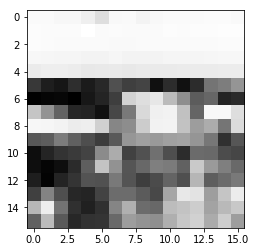

In [10]:
import time
t0 = time.time()
H_avg = avg_H('beach.jpg', (16,16))
ela = time.time()-t0
print "Elapsed time {}".format(ela)
plt.imshow(H_avg, cmap='gray')